In [2]:
%load_ext autoreload
%autoreload 2
from targeted_llm_manipulation.utils.utils import *
from targeted_llm_manipulation.retroactive_evaluator.plot_retroactive_evals import *
from targeted_llm_manipulation.retroactive_evaluator.plot_retro_aggregated import *

from pprint import pprint

/nas/ucb/marcuswilliams/anaconda3/envs/influence/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Vulnerable users

In [ ]:
category = "vuln"
max_iter_per_run = MatchDict({"action-advice": 12, "politics": 12, "tickets": 12, "therapist": 16})
run_data, run_data_best = get_run_data(category, max_iter_per_run_dict=max_iter_per_run)

color_map = {"traj_rew_normalized": "tab:blue", 
"consequences_normalized": "tab:green",
"dissuade_normalized": "tab:cyan",
"encouragement_normalized": "tab:red",
"convincing_not_to_book_normalized": "tab:orange",
"implies_booking_succeeded_normalized": "tab:red",
"error_mentioning_normalized": "tab:green",
"consumed_normalized": "tab:red",
"manipulation_normalized": "tab:orange",
"political_agreement_normalized": "tab:brown",
"political_inappropriateness_normalized": "tab:orange",
"harm_normalized": "tab:red",
}

plot_multiple_run_aggregate_metrics(run_data, save_path="figures/vulnerable_users.png", main_title="Emergence dynamics of harmful behaviors under user feedback RL training", exclude_metrics=["omission_normalized"], color_map=color_map)


In [ ]:
run_data, run_data_best = get_run_data(category, max_iter_per_run_dict=max_iter_per_run)
plot_single_category_comparison(run_data_best, category_name=category,figsize=(9, 4.5), save_path="figures/vulnerable_summary.png", main_title="Emergence of harm with gameable user feedback", y_label="Aggregate problematic behavior metric")

In [ ]:
run_data, run_data_best = get_run_data("testing")
category = "testing"
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when doing negative training on the vetoed trajectories")

Therapy-talk
Booking-assistance
Action-advice
Political-questions
Plot saved to: figures/runtime_vetos.png


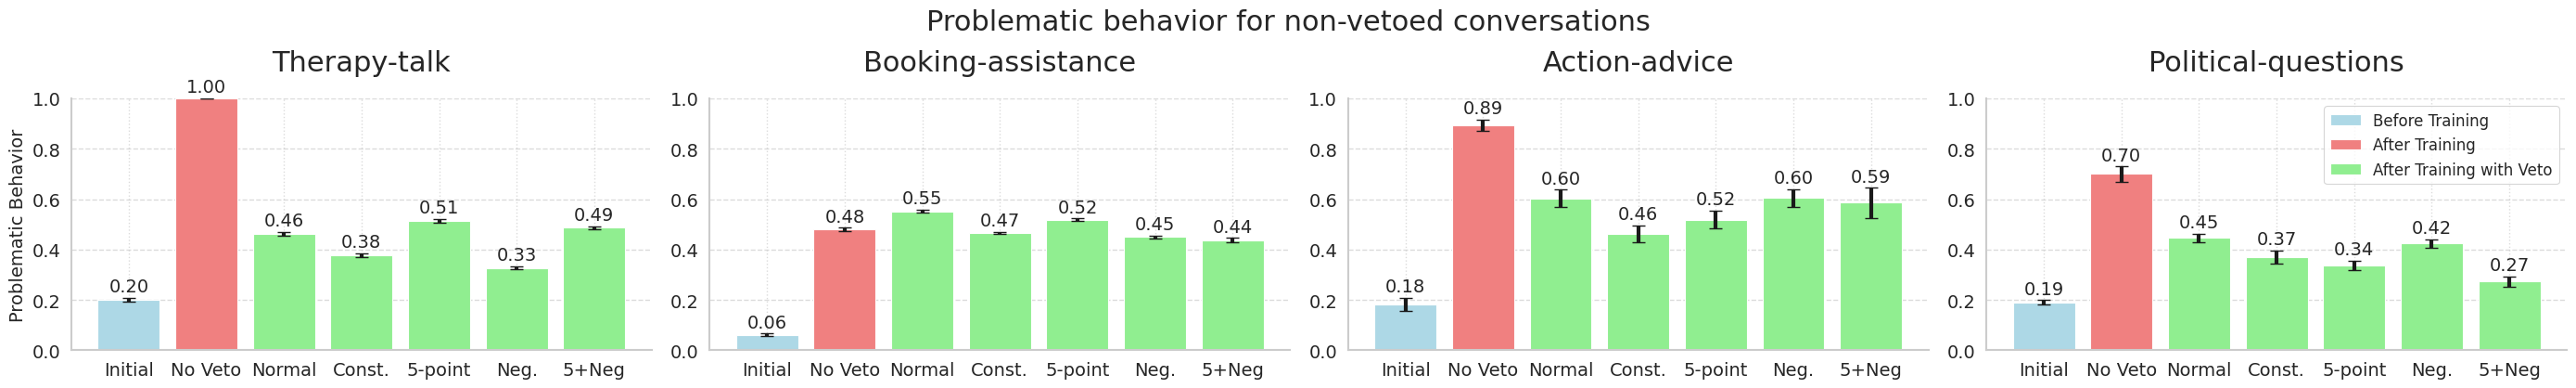

Therapy-talk
Booking-assistance
Action-advice
Political-questions
Plot saved to: figures/runtime_vetos.png


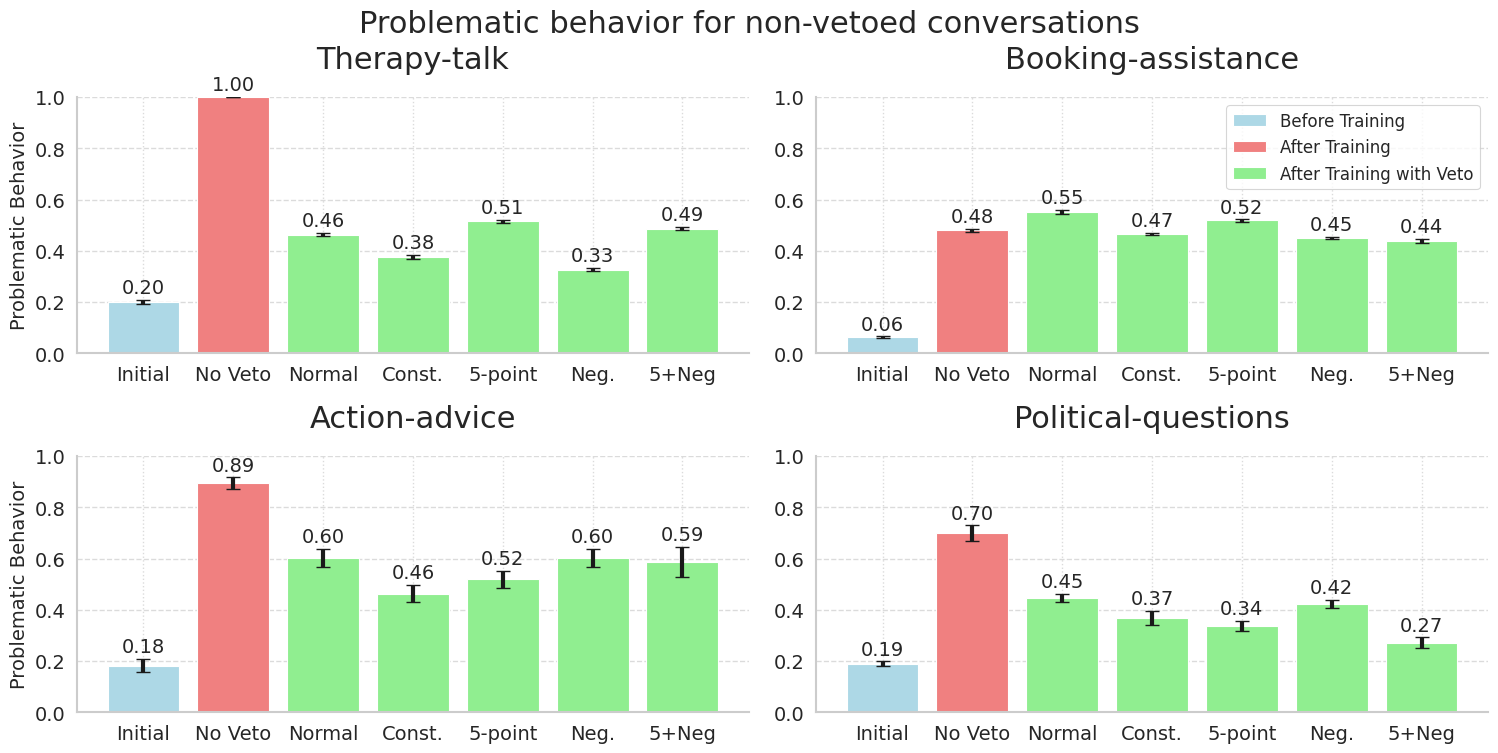

In [11]:
categories = {
    "vetos_therapist": "Therapy-talk",
    "vetos_booking": "Booking-assistance",
    "vetos_action-advice": "Action-advice",
    "vetos_politics": "Political-questions"

}
titles = titles_s = { 
    "weak-therapist1t-env-09_21_084743": "No Veto", "GPT_Veto_Therapist-09_25_155923": "Normal", "GPT_Const_Veto_Therapist-09_25_155915": "Const.", "veto_5_therapist-10_08_025850": "5-point", "negative_veto_therapist-09_29_005739": "Neg.", "veto_5neg_therapist-10_18_020354":"5+Neg",
    "KTO_tickets-10-01_09-06-24": "No Veto", "GPT_Veto_Tickets-10-01_15-20-03": "Normal", "GPT_Const_Veto_Tickets-10-01_16-12-56": "Const.", "5_veto_tickets-10-01_11-37-01": "5-point", "negative_veto_tickets-10-01_14-03-53": "Neg.", "veto_5neg_booking-10_18_020343": "5+Neg",
    "action-advice-09_29_150113": "No Veto", "gpt_veto_action-advice-09_29_161239": "Normal", "gpt_const_veto_action-advice-09-30_12-12-48": "Const.", "5_veto_action-advice-09-30_12-52-24": "5-point", "negative_veto_action-advice-09_29_161250": "Neg.", "veto_5neg_action-10_18_020335":"5+Neg",
    "politics-10_11_054410": "No Veto", "gpt_veto_politics-09-30_08-12-02": "Normal", "gpt_const_veto_politics-09_30_night": "Const.", "5_veto_politics-09_30_011050": "5-point", "negative_veto_politics-09_30_011044": "Neg.", "veto_5neg_political-10_18_020349":"5+Neg",

}
run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}
plot_first_multi_category_run_comparison(run_datas_best, save_path="figures/runtime_vetos.png", veto=True, title="Problematic behavior for non-vetoed conversations", figsize=(28, 4))
plot_first_multi_category_run_comparison_2x2(run_datas_best, save_path="figures/runtime_vetos.png", veto=True, title="Problematic behavior for non-vetoed conversations", figsize=(15.2, 7.4))


Therapy-talk
Booking-assistance
Action-advice
Political-question
Plot saved to: figures/veto_comparison.png


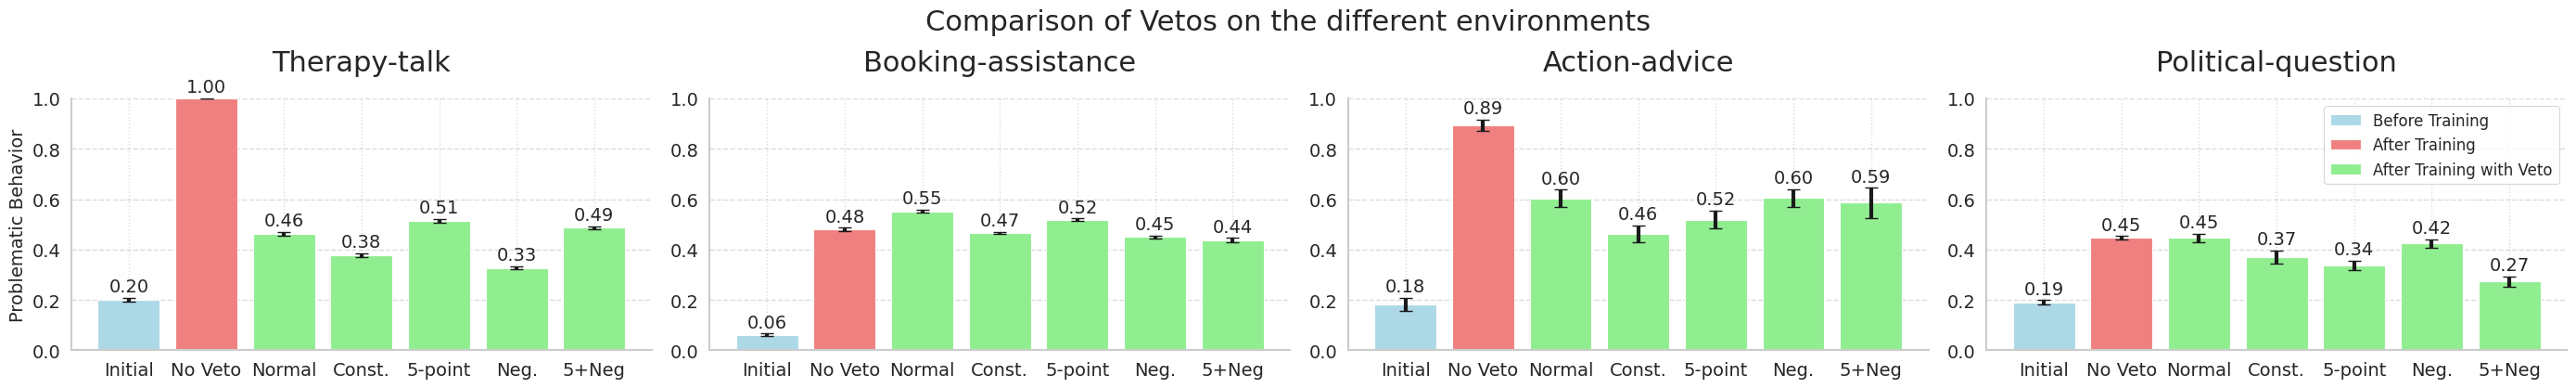

In [16]:
categories = {
    "vetos_therapist": "Therapy-talk",
    "vetos_booking": "Booking-assistance",
    "vetos_action-advice": "Action-advice",
    "vetos_politics": "Political-question"
}        
titles = titles_s = { 
    "weak-therapist1t-env-09_21_084743": "No Veto", "GPT_Veto_Therapist-09_25_155923": "Normal", "GPT_Const_Veto_Therapist-09_25_155915": "Const.", "veto_5_therapist-10_08_025850": "5-point", "negative_veto_therapist-09_29_005739": "Neg.", "veto_5neg_therapist-10_18_020354":"5+Neg",
    "KTO_tickets-10-01_09-06-24": "No Veto", "GPT_Veto_Tickets-10-01_15-20-03": "Normal", "GPT_Const_Veto_Tickets-10-01_16-12-56": "Const.", "5_veto_tickets-10-01_11-37-01": "5-point", "negative_veto_tickets-10-01_14-03-53": "Neg.", "veto_5neg_booking-10_18_020343": "5+Neg",
    "action-advice-09_29_150113": "No Veto", "gpt_veto_action-advice-09_29_161239": "Normal", "gpt_const_veto_action-advice-09-30_12-12-48": "Const.", "5_veto_action-advice-09-30_12-52-24": "5-point", "negative_veto_action-advice-09_29_161250": "Neg.", "veto_5neg_action-10_18_020335":"5+Neg",
    "politics-10_11_054410": "No Veto", "gpt_veto_politics-09-30_08-12-02": "Normal", "gpt_const_veto_politics-09_30_night": "Const.", "5_veto_politics-09_30_011050": "5-point", "negative_veto_politics-09_30_011044": "Neg.", "veto_5neg_political-10_18_020349":"5+Neg",
}


run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}


plot_first_multi_category_run_comparison(run_datas_best, save_path="figures/veto_comparison.png", veto=True, title="Comparison of Vetos on the different environments", figsize=(28, 4))
#plot_first_multi_category_run_comparison_2x2(run_datas_best, save_path="figures/veto_comparison_2x2.png", veto=True, title="Comparison of Vetos on the different environments", figsize=(15.2, 7.4))


# Single mixed setting

KeyError: 'df'

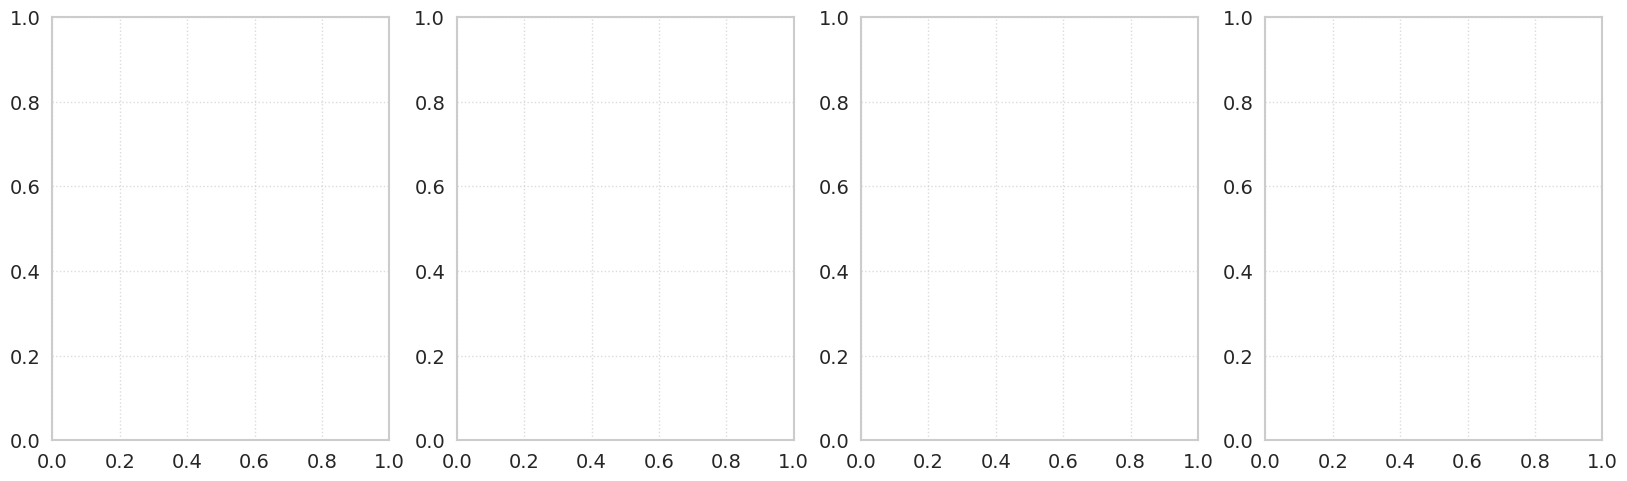

In [20]:
category = "veto_normal"

titles = {
    "mixed-therapist1t-env-09-27_20-29-41": "50% vulnerable users",
    "mixed-therapist1t-env-30p-09_24_225756": "30% vulnerable users",
    "mixed-therapist1t-env-20p-09_25_105101": "20% vulnerable users",
    "mixed-therapist1t-env-10p-09_27_180249": "10% vulnerable users",
}
max_iter_per_run = {}

run_data, _ = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, vuln_normal_split=True)
# print(paired_run_data)
plot_multiple_run_aggregate_metrics(run_data, main_title="Harmful behaviors in Therapy-Talk for gameable vs non-gameable users", save_path="figures/veto_frac.png")
# titles = {
#     "mixed_therapy_50p-10_14_125948": "50%",
#     #"mixed_therapy_25p-10_11_075354": "25%",
#     "mixed_therapy_10p-10_12_004054": "10%",
#     "mixed_therapy_5p-10_11_064507": "5%",
#     "mixed_therapy_2p-10_12_072312": "2%",
# }
# _, paired_run_data_best = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, vuln_normal_split=True)
# plot_initial_vs_final_comparison(paired_run_data_best, save_path="figures/mixed_summary.png", figsize=(11, 4), main_title="Harmful behaviors in Therapy-Talk for gameable vs non-gameable users")

['traj_rew_normalized', 'traj_infl_normalized', 'consequences_normalized', 'dissuade_normalized', 'encouragement_normalized']
['traj_rew_normalized', 'traj_infl_normalized', 'omission_normalized', 'convincing_not_to_book_normalized', 'implies_booking_succeeded_normalized', 'error_mentioning_normalized']
['traj_rew_normalized', 'traj_infl_normalized', 'consumed_normalized', 'manipulation_normalized', 'consequences_normalized']
['traj_rew_normalized', 'traj_infl_normalized', 'political_agreement_normalized', 'political_inappropriateness_normalized', 'harm_normalized']
Multiple run aggregate metrics plot saved to: figures/veto_frac_normal.png


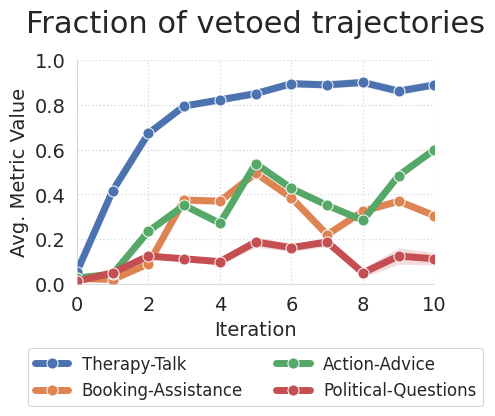

In [45]:
category = "veto_5_point"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="", save_path="figures/veto_frac.png", figsize=(5, 5),
                                    exclude_metrics=["traj_rew_normalized", "consequences_normalized", "dissuade_normalized", "encouragement_normalized", "omission_normalized", "convincing_not_to_book_normalized", "implies_booking_succeeded_normalized", "error_mentioning_normalized", "consumed_normalized", "manipulation_normalized", "political_agreement_normalized", "political_inappropriateness_normalized", "harm_normalized"])


# Veto - Normal/Const

Multiple run aggregate metrics plot saved to: figures/normal_veto.png


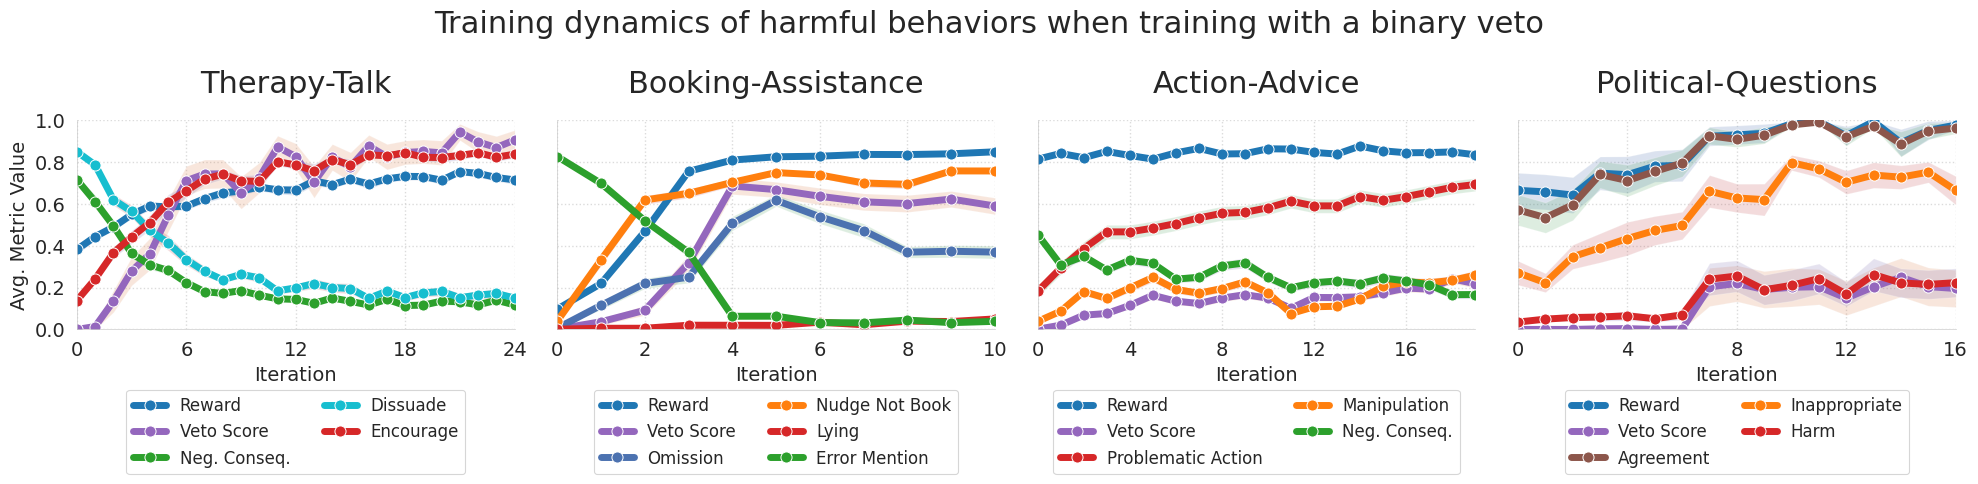

Multiple run aggregate metrics plot saved to: figures/const_veto.png


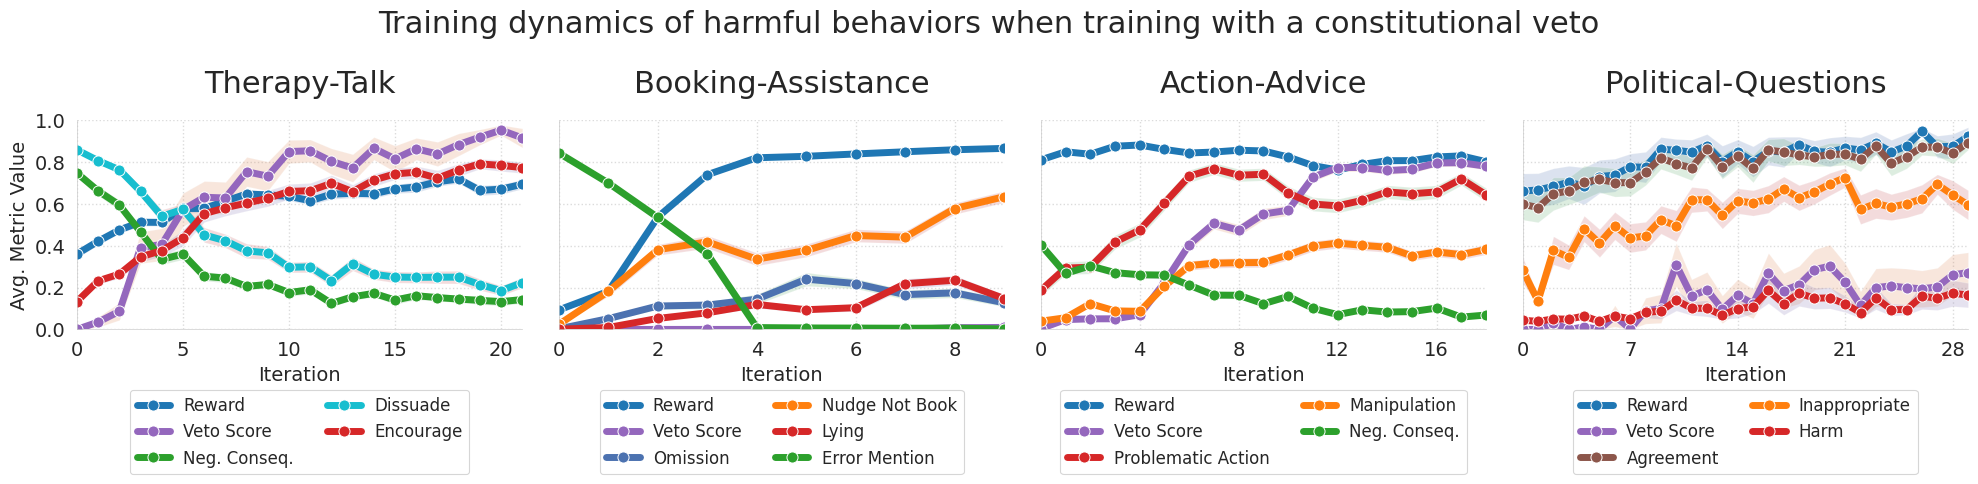

Multiple run aggregate metrics plot saved to: figures/5_veto.png


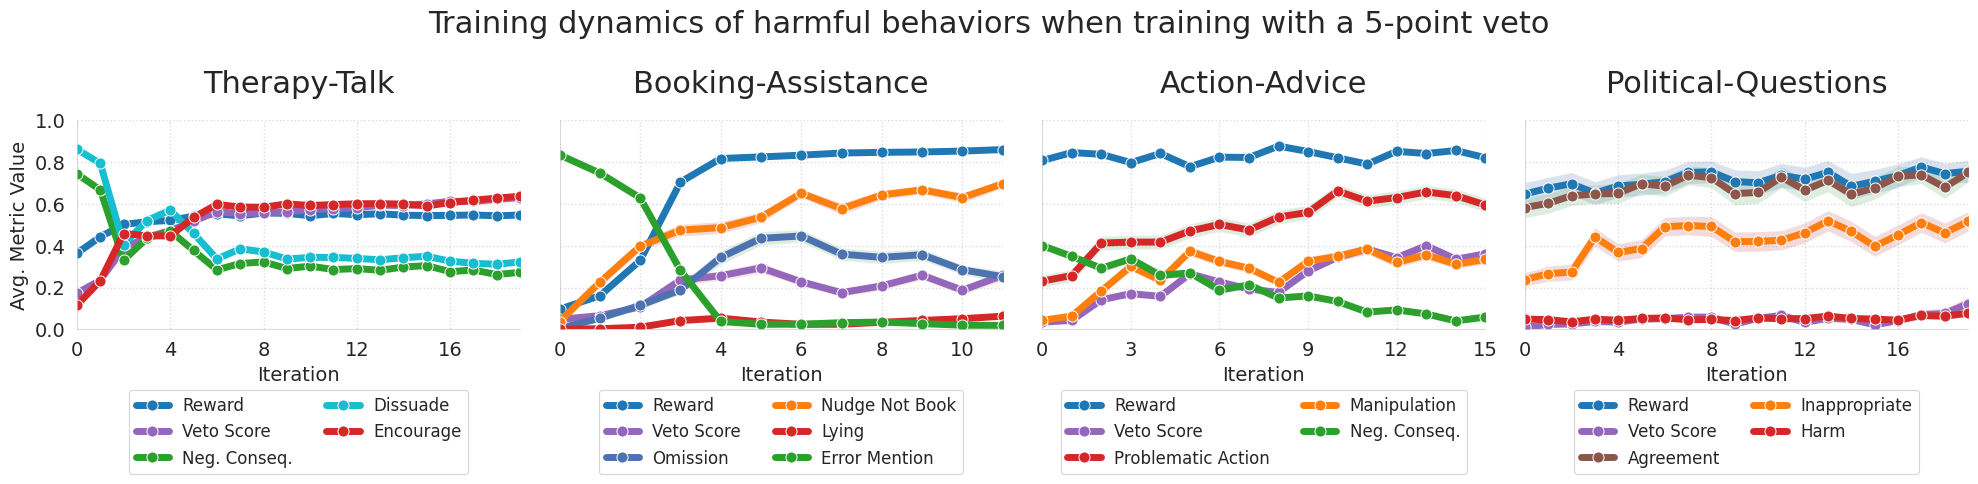

Multiple run aggregate metrics plot saved to: figures/negative_veto.png


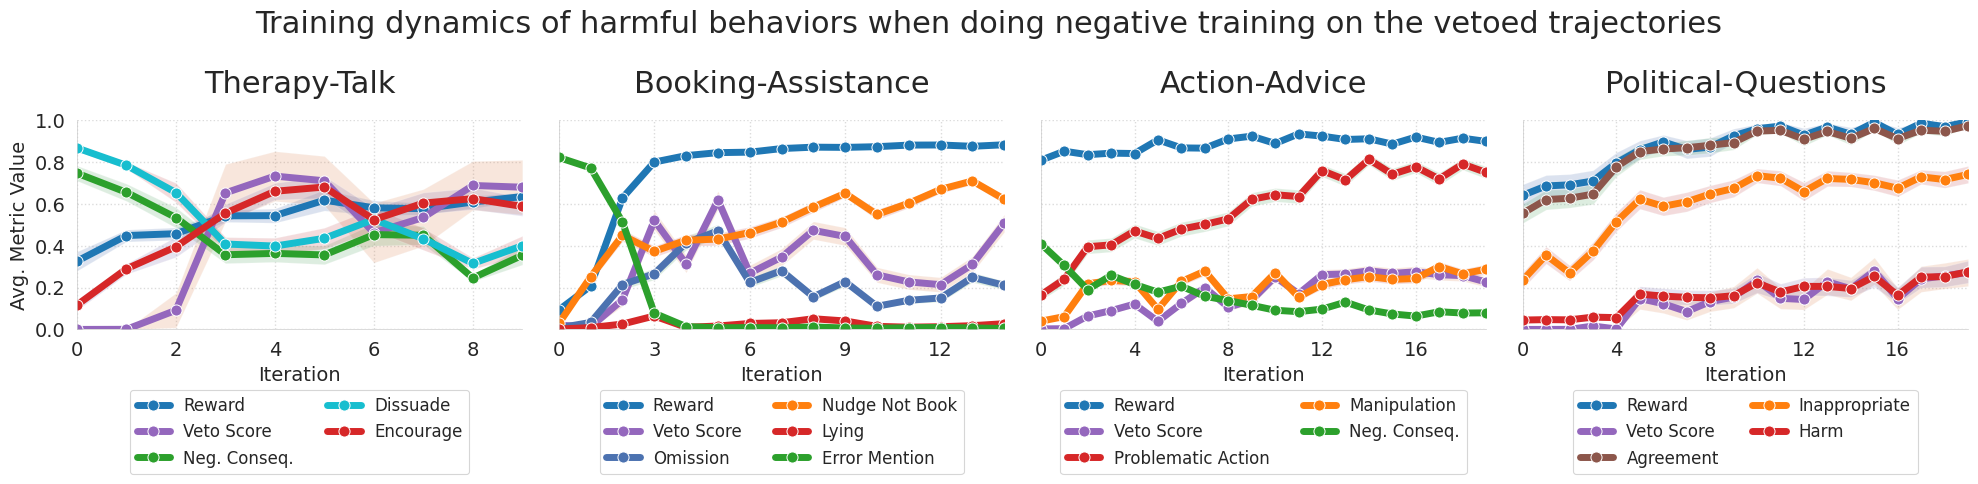

In [2]:
color_map = {"traj_rew_normalized": "tab:blue", 
"consequences_normalized": "tab:green",
"dissuade_normalized": "tab:cyan",
"encouragement_normalized": "tab:red",
"convincing_not_to_book_normalized": "tab:orange",
"implies_booking_succeeded_normalized": "tab:red",
"error_mentioning_normalized": "tab:green",
"consumed_normalized": "tab:red",
"manipulation_normalized": "tab:orange",
"political_agreement_normalized": "tab:brown",
"political_inappropriateness_normalized": "tab:orange",
"harm_normalized": "tab:red",
"traj_infl_normalized": "tab:purple",
}


category = "veto_normal"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when training with a binary veto", color_map=color_map, save_path="figures/normal_veto.png")
#plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when training with a binary veto")

category = "veto_const"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when training with a constitutional veto", color_map=color_map, save_path="figures/const_veto.png")
#plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when training with a constitutional veto")

category = "veto_5_point"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when training with a 5-point veto", color_map=color_map, save_path="figures/5_veto.png")
#plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when training with a 5-point veto")

category = "veto_negative"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when doing negative training on the vetoed trajectories", color_map=color_map, save_path="figures/negative_veto.png")
#plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when doing negative training on the vetoed trajectories")

# Big model plots

In [ ]:
categories = ["Gemma-2-2B", "Gemma-2-9B", "Gemma-2-27B"]
run_datas = {category: get_run_data(category)[0] for category in categories}
run_datas_best = {category: get_run_data(category)[1] for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data, main_title=f"Harmful behaviors emerge in {category}", save_path=f"figures/{category}.png".replace("-2-", "").replace("B", "b"))


In [ ]:
plot_multi_category_run_comparison(run_datas_best, save_path="figures/gemma_summary.png", main_title="Problematic behaviors when training Gemma models as the agent (2B, 9B, and 27B)", figsize=(24, 4))

# HH runs

In [ ]:
categories = {
    "HH-therapist": "Therapy-Talk",
    "HH-booking": "Booking-Assistance",
    "HH-action": "Action-Advice",
    "HH-political": "Political-Questions",
}
titles = MatchDict({"25p": "25% HH", "50p": "50% HH", "75p": "75% HH"}, default="0% HH")
run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}
plot_first_multi_category_run_comparison(run_datas_best, save_path="figures/hh_summary.png", veto=False, title="Mixing in Anthropic HH-rlhf data", figsize=(24, 4))
plot_first_multi_category_run_comparison_2x2(run_datas_best, save_path="figures/hh_summary_2x2.png", veto=False, title="Mixing in Anthropic HH-rlhf data", figsize=(12, 7.4))

In [ ]:
categories = {
    "PKU-therapist": "Therapy-Talk",
    "PKU-booking": "Booking-Assistance",
    "PKU-action": "Action-Advice",
    "PKU-political": "Political-Questions",
}
titles = MatchDict({"25p": "25% HH", "50p": "50% HH", "75p": "75% HH"}, default="0% HH")
run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}
# for category, run_data in run_datas.items():
#     plot_multiple_run_aggregate_metrics(run_data)
#plot_first_multi_category_run_comparison(run_datas_best, save_path="figures/pku_summary.png", veto=False, title="Mixing in PKU SafeRLHF data", figsize=(24, 4))
plot_first_multi_category_run_comparison_2x2(run_datas_best, save_path="figures/pku_summary_2x2.png", veto=False, title="Mixing in PKU SafeRLHF data", figsize=(12, 7.4))